In [1]:
using Pkg
Pkg.activate(".")
using MCMRSimulator
import Blink: Window, body!
using Plots
import RecipesBase: @shorthands, @userplot, @recipe, @series, AbstractPlot
import Statistics: mean
#plotlyjs()

  Activating new project at `~/.julia/dev/MRSimulator/examples`
┌ Info: Precompiling MRSimulator [eac06e4d-a854-4bf6-b44f-54c98b0401d1]
└ @ Base loading.jl:1423


WebIO._IJuliaInit()

In [2]:
micro = Microstructure(off_resonance=field([.1, 0, 0], 0.))
spins = [Spin(position=[x, 0, 0]) for x in -10:10];

┌ Warning: Keyword argument letter not supported with Plots.GRBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, connections, contour_labels, discrete_values, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, html_output_format, inset_subplots, label, layout, left_margin, legend_background_color, legend_font_color, legend_font_family, legend_font_halign, legend_font_pointsize, legend_font_rotation, legend_font_valign, legend_foreground_color, legend_positio

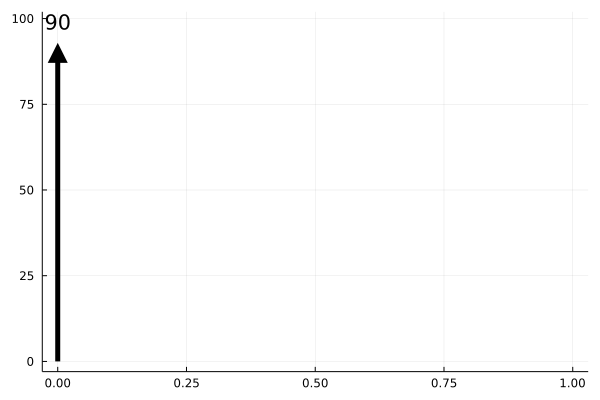

In [3]:
sequence = Sequence([
    RFPulse(flip_angle=90, phase=0, time=0.)
], 10.);
plot(sequence)

In [4]:
res = evolve(spins, micro, sequence);

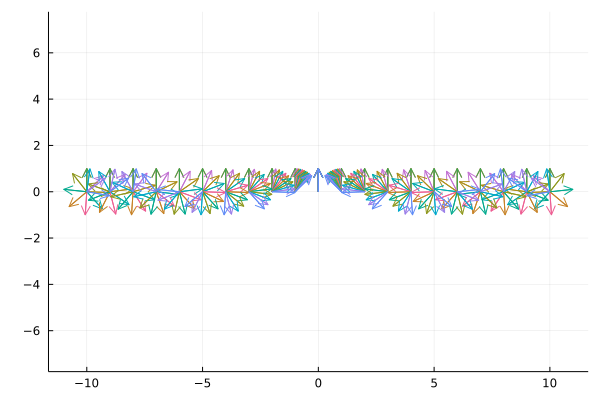

In [5]:
p = plot()
for snap in res
    plot!(snap)
end
p

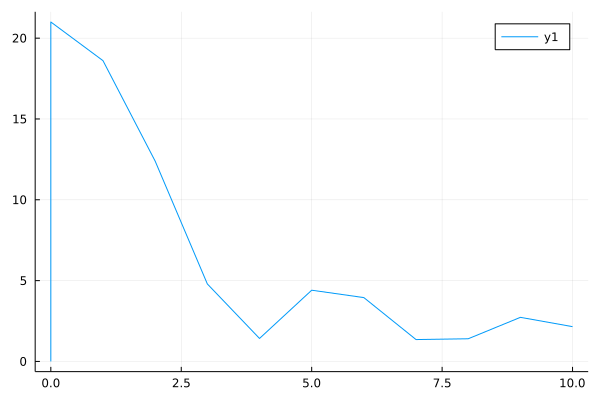

In [8]:
plot(MRSimulator.time.(res), MRSimulator.transverse.(res))